In [1]:
import re

import numpy as np

from matplotlib import pyplot as plt
from IPython.display import display, Markdown
from pathlib import Path
from collections import defaultdict

In [2]:
BIODIVERSITY_PATTERN = re.compile(r"The simulation resulted in a biodiversity of (\d+) unique species\.")
EXECUTION_PATTERN = re.compile(r"The simulation took:\n - initialisation: ([^\n]+)\n - execution: ([^\n]+)\n - cleanup: ([^\n]+)\n")

In [3]:
TIME_PATTERN = re.compile(r"(\d+\.\d+)([^\d]+)")
TIME_UNITS = {
    "ns": 0.000000001,
    "µs": 0.000001,
    "ms": 0.001,
    "s": 1.0,
}

def parse_time(time_str):
    match = TIME_PATTERN.match(time_str)
    
    if match is None:
        return None
    
    return float(match.group(1)) * TIME_UNITS[match.group(2)]

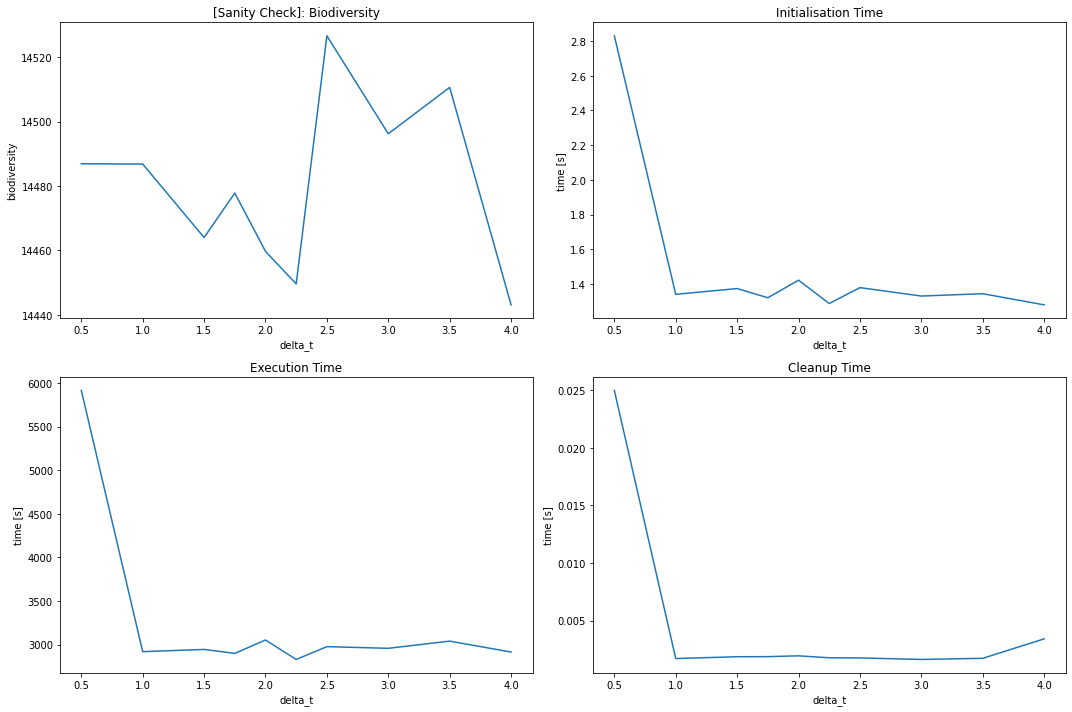

In [4]:
DELTA_T_FILE_PATTERN = re.compile(r"pbs\.(\d+\.\d+)\.o\d+\.\d+")

results = defaultdict(list)

for path in Path("delta-t").iterdir():
    match = DELTA_T_FILE_PATTERN.match(path.name)
    
    if match is None:
        continue
        
    delta_t = float(match.group(1))
    
    with open(path) as file:
        stdout = file.read()
    
    match = BIODIVERSITY_PATTERN.search(stdout)
    if match is None:
        continue
    biodiversity = int(match.group(1))

    match = EXECUTION_PATTERN.search(stdout)
    if match is None:
        continue
    initialisation = parse_time(match.group(1))
    execution = parse_time(match.group(2))
    cleanup = parse_time(match.group(3))
    
    results[delta_t].append((biodiversity, initialisation, execution, cleanup))
    
results = { delta_t: [np.mean(s) for s in zip(*result)] for delta_t, result in results.items() }

delta_ts, biodiversities, initialisations, executions, cleanups = zip(*sorted([delta_t] + rs for delta_t, rs in results.items()))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

ax1.set_title("[Sanity Check]: Biodiversity")
ax1.set_xlabel("delta_t")
ax1.set_ylabel("biodiversity")
ax1.plot(delta_ts, biodiversities)

ax2.set_title("Initialisation Time")
ax2.set_xlabel("delta_t")
ax2.set_ylabel("time [s]")
ax2.plot(delta_ts, initialisations)

ax3.set_title("Execution Time")
ax3.set_xlabel("delta_t")
ax3.set_ylabel("time [s]")
ax3.plot(delta_ts, executions)

ax4.set_title("Cleanup Time")
ax4.set_xlabel("delta_t")
ax4.set_ylabel("time [s]")
ax4.plot(delta_ts, cleanups)

plt.tight_layout()
plt.show()

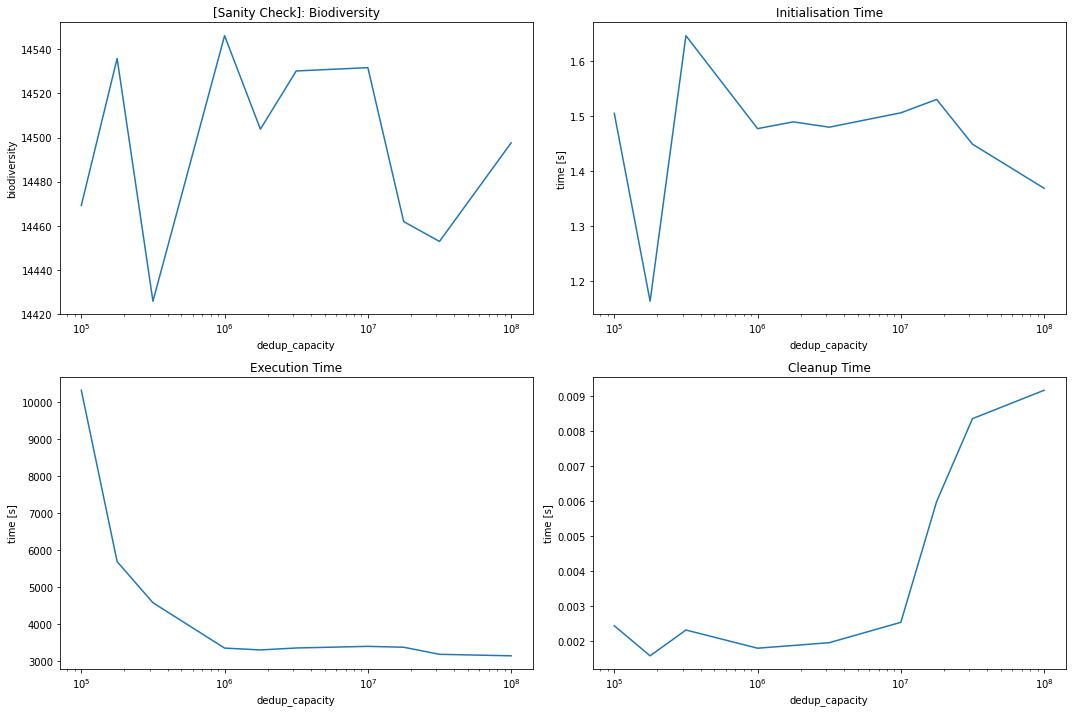

In [5]:
DEDUP_CAPACITY_FILE_PATTERN = re.compile(r"pbs\.(\d+)\.o\d+\.\d+")

results = defaultdict(list)

for path in Path("dedup-capacity").iterdir():
    match = DEDUP_CAPACITY_FILE_PATTERN.match(path.name)
    
    if match is None:
        continue
        
    dedup_capacity = int(match.group(1))
    
    with open(path) as file:
        stdout = file.read()
    
    match = BIODIVERSITY_PATTERN.search(stdout)
    if match is None:
        continue
    biodiversity = int(match.group(1))

    match = EXECUTION_PATTERN.search(stdout)
    if match is None:
        continue
    initialisation = parse_time(match.group(1))
    execution = parse_time(match.group(2))
    cleanup = parse_time(match.group(3))
    
    results[dedup_capacity].append((biodiversity, initialisation, execution, cleanup))

results = { dedup_capacity: [np.mean(s) for s in zip(*result)] for dedup_capacity, result in results.items() }

dedup_capacities, biodiversities, initialisations, executions, cleanups = zip(*sorted([dedup_capacity] + rs for dedup_capacity, rs in results.items()))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

ax1.set_title("[Sanity Check]: Biodiversity")
ax1.set_xlabel("dedup_capacity")
ax1.set_ylabel("biodiversity")
ax1.set_xscale("log")
ax1.plot(dedup_capacities, biodiversities)

ax2.set_title("Initialisation Time")
ax2.set_xlabel("dedup_capacity")
ax2.set_ylabel("time [s]")
ax2.set_xscale("log")
ax2.plot(dedup_capacities, initialisations)

ax3.set_title("Execution Time")
ax3.set_xlabel("dedup_capacity")
ax3.set_ylabel("time [s]")
ax3.set_xscale("log")
ax3.plot(dedup_capacities, executions)

ax4.set_title("Cleanup Time")
ax4.set_xlabel("dedup_capacity")
ax4.set_ylabel("time [s]")
ax4.set_xscale("log")
ax4.plot(dedup_capacities, cleanups)

plt.tight_layout()
plt.show()

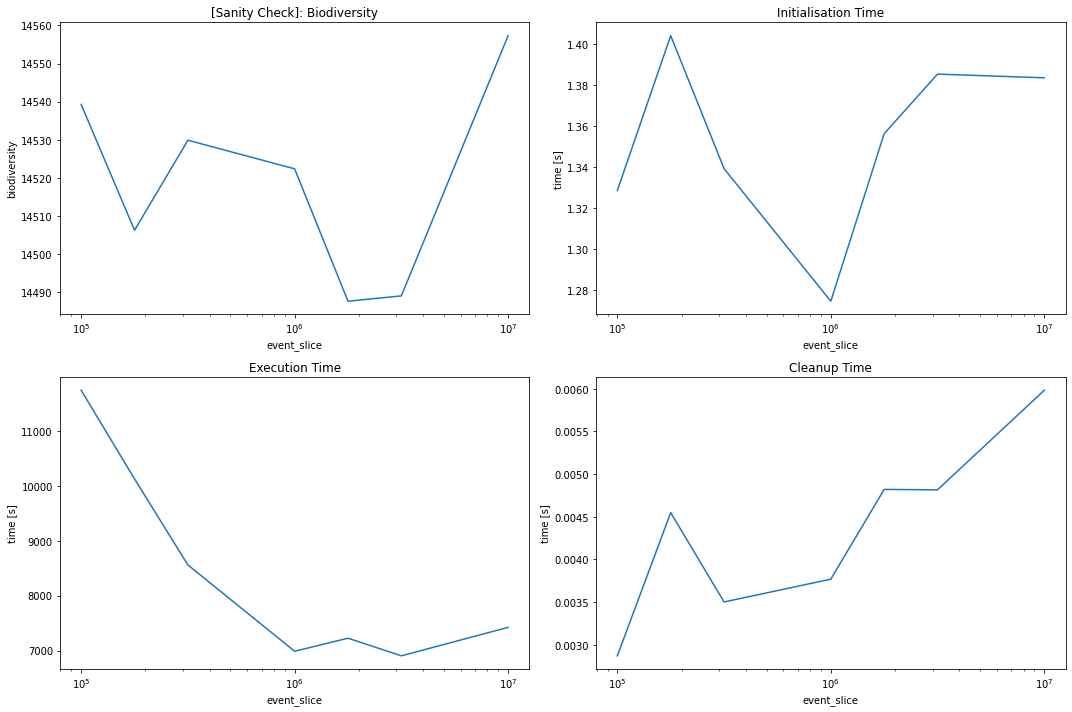

In [6]:
EVENT_SLICE_FILE_PATTERN = re.compile(r"pbs\.(\d+)\.o\d+\.\d+")

results = defaultdict(list)

for path in Path("event-slice").iterdir():
    match = EVENT_SLICE_FILE_PATTERN.match(path.name)
    
    if match is None:
        continue
        
    event_slice = int(match.group(1))
    
    with open(path) as file:
        stdout = file.read()
    
    match = BIODIVERSITY_PATTERN.search(stdout)
    if match is None:
        continue
    biodiversity = int(match.group(1))

    match = EXECUTION_PATTERN.search(stdout)
    if match is None:
        continue
    initialisation = parse_time(match.group(1))
    execution = parse_time(match.group(2))
    cleanup = parse_time(match.group(3))
    
    results[event_slice].append((biodiversity, initialisation, execution, cleanup))

results = { event_slice: [np.mean(s) for s in zip(*result)] for event_slice, result in results.items() }

event_slices, biodiversities, initialisations, executions, cleanups = zip(*sorted([event_slice] + rs for event_slice, rs in results.items()))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

ax1.set_title("[Sanity Check]: Biodiversity")
ax1.set_xlabel("event_slice")
ax1.set_ylabel("biodiversity")
ax1.set_xscale("log")
ax1.plot(event_slices, biodiversities)

ax2.set_title("Initialisation Time")
ax2.set_xlabel("event_slice")
ax2.set_ylabel("time [s]")
ax2.set_xscale("log")
ax2.plot(event_slices, initialisations)

ax3.set_title("Execution Time")
ax3.set_xlabel("event_slice")
ax3.set_ylabel("time [s]")
ax3.set_xscale("log")
ax3.plot(event_slices, executions)

ax4.set_title("Cleanup Time")
ax4.set_xlabel("event_slice")
ax4.set_ylabel("time [s]")
ax4.set_xscale("log")
ax4.plot(event_slices, cleanups)

plt.tight_layout()
plt.show()

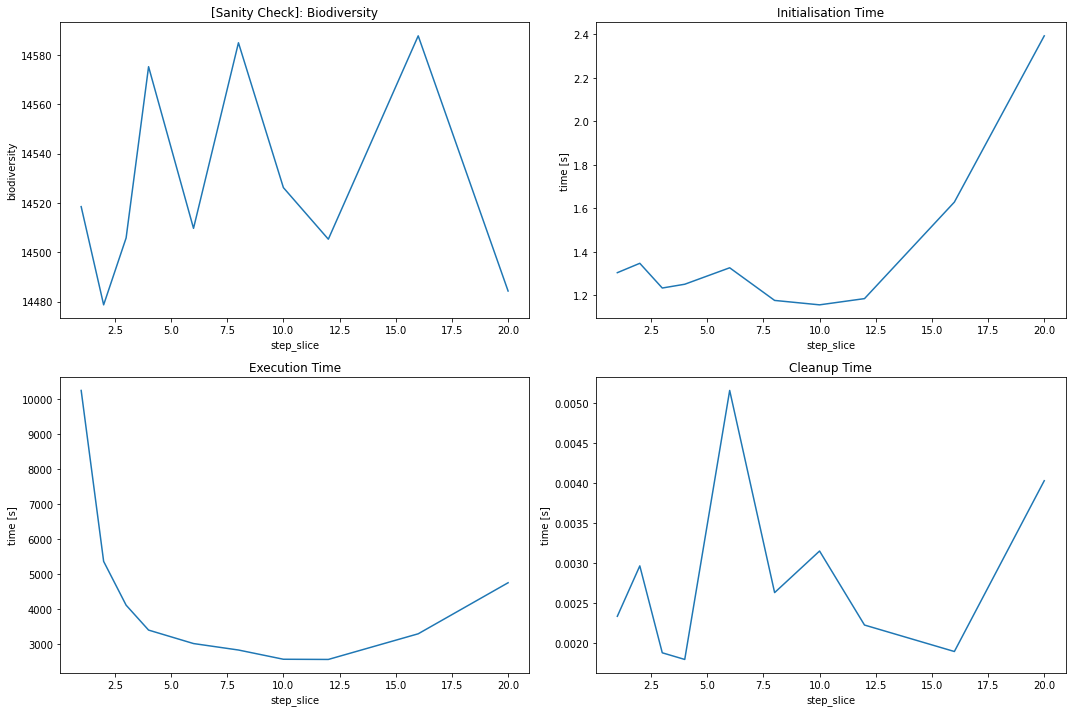

In [7]:
STEP_SLICE_FILE_PATTERN = re.compile(r"pbs\.(\d+)\.o\d+\.\d+")

results = defaultdict(list)

for path in Path("step-slice").iterdir():
    match = STEP_SLICE_FILE_PATTERN.match(path.name)
    
    if match is None:
        continue
        
    step_slice = int(match.group(1))
    
    with open(path) as file:
        stdout = file.read()
    
    match = BIODIVERSITY_PATTERN.search(stdout)
    if match is None:
        continue
    biodiversity = int(match.group(1))

    match = EXECUTION_PATTERN.search(stdout)
    if match is None:
        continue
    initialisation = parse_time(match.group(1))
    execution = parse_time(match.group(2))
    cleanup = parse_time(match.group(3))
    
    results[step_slice].append((biodiversity, initialisation, execution, cleanup))

results = { step_slice: [np.mean(s) for s in zip(*result)] for step_slice, result in results.items() }

step_slices, biodiversities, initialisations, executions, cleanups = zip(*sorted([step_slice] + rs for step_slice, rs in results.items()))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

ax1.set_title("[Sanity Check]: Biodiversity")
ax1.set_xlabel("step_slice")
ax1.set_ylabel("biodiversity")
ax1.plot(step_slices, biodiversities)

ax2.set_title("Initialisation Time")
ax2.set_xlabel("step_slice")
ax2.set_ylabel("time [s]")
ax2.plot(step_slices, initialisations)

ax3.set_title("Execution Time")
ax3.set_xlabel("step_slice")
ax3.set_ylabel("time [s]")
ax3.plot(step_slices, executions)

ax4.set_title("Cleanup Time")
ax4.set_xlabel("step_slice")
ax4.set_ylabel("time [s]")
ax4.plot(step_slices, cleanups)

plt.tight_layout()
plt.show()

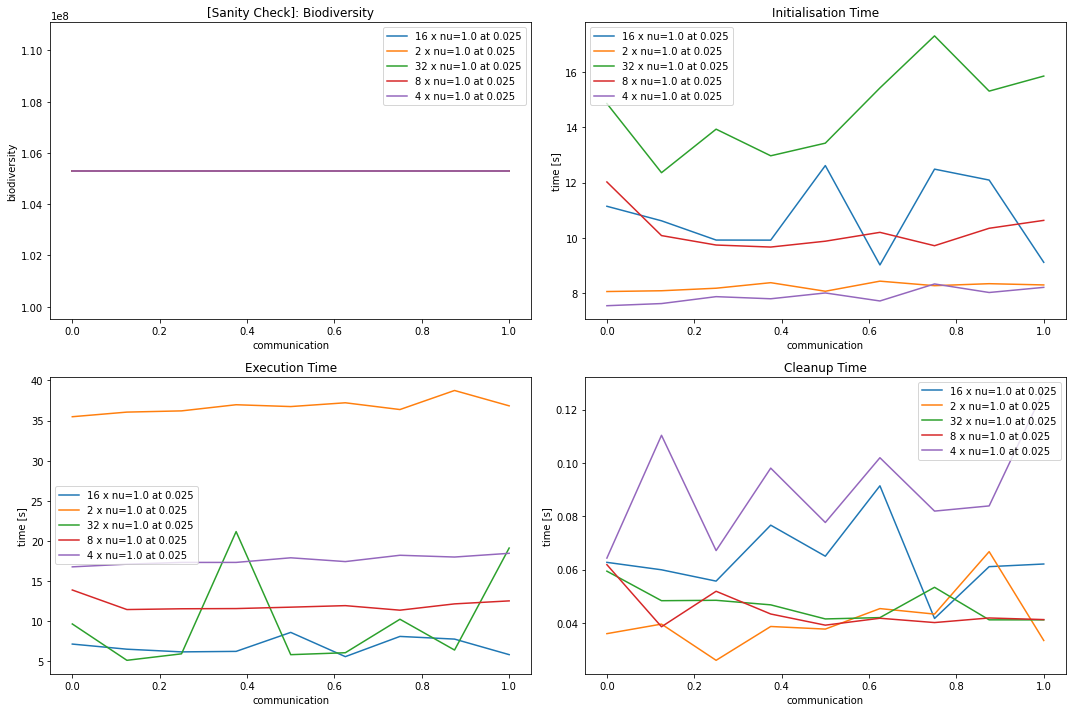

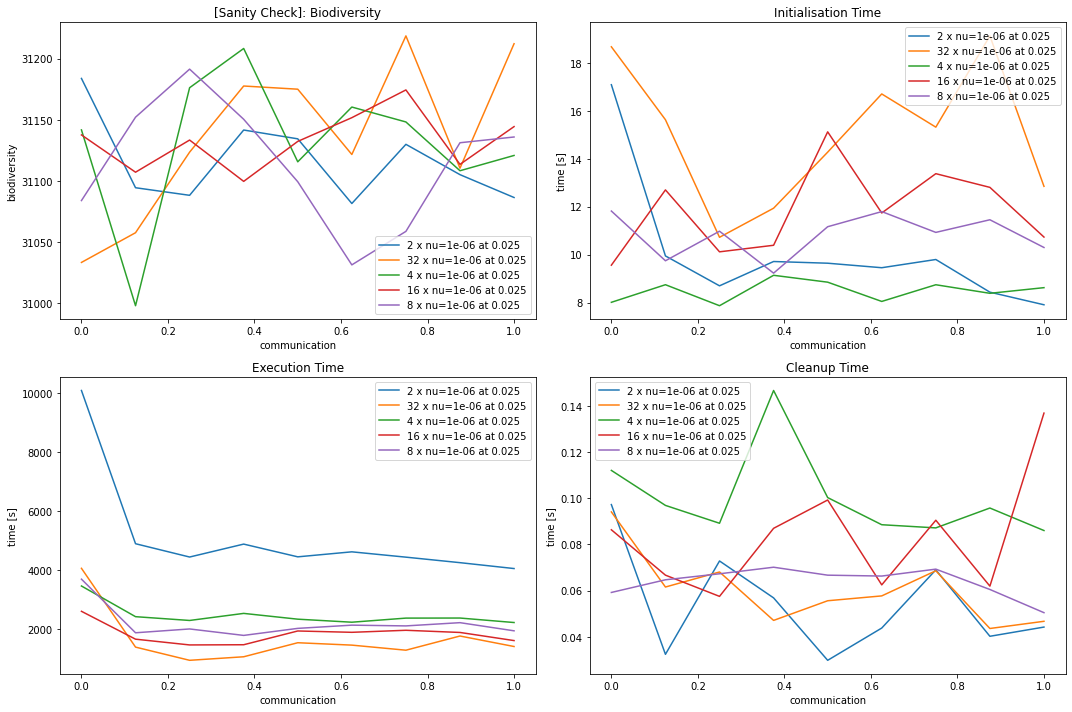

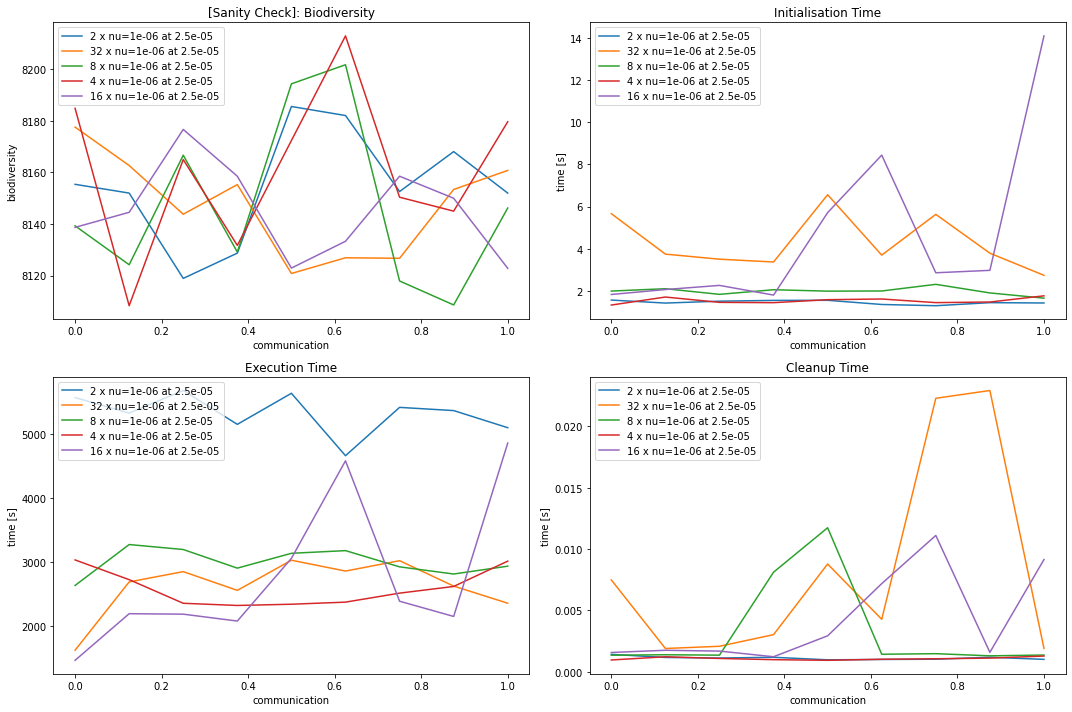

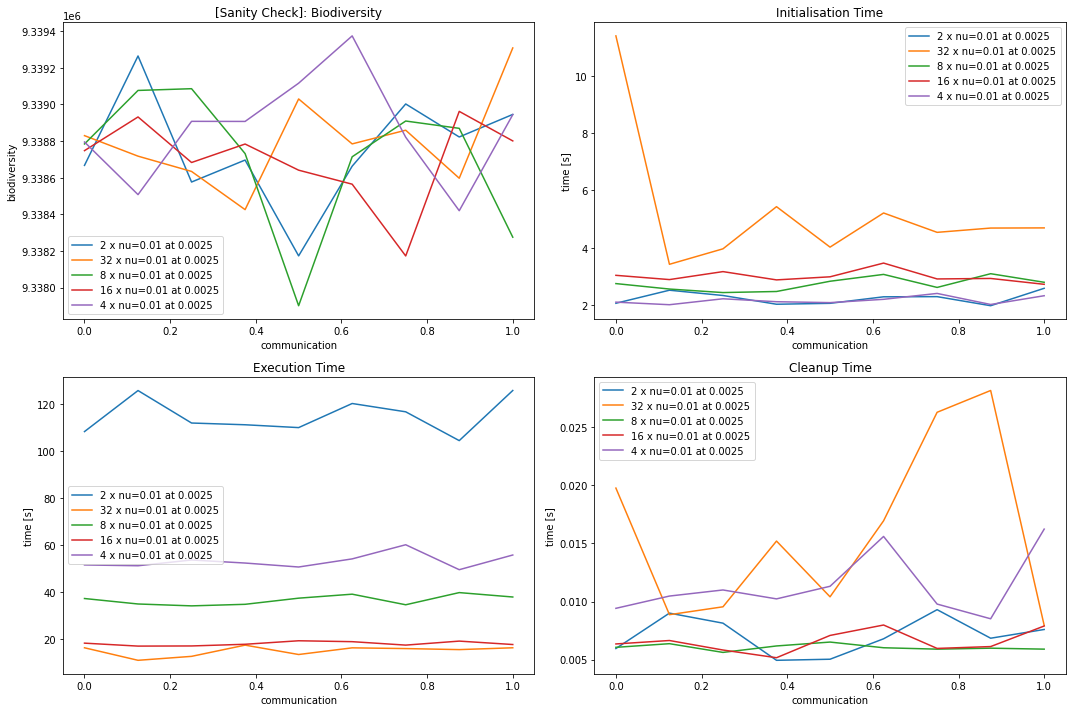

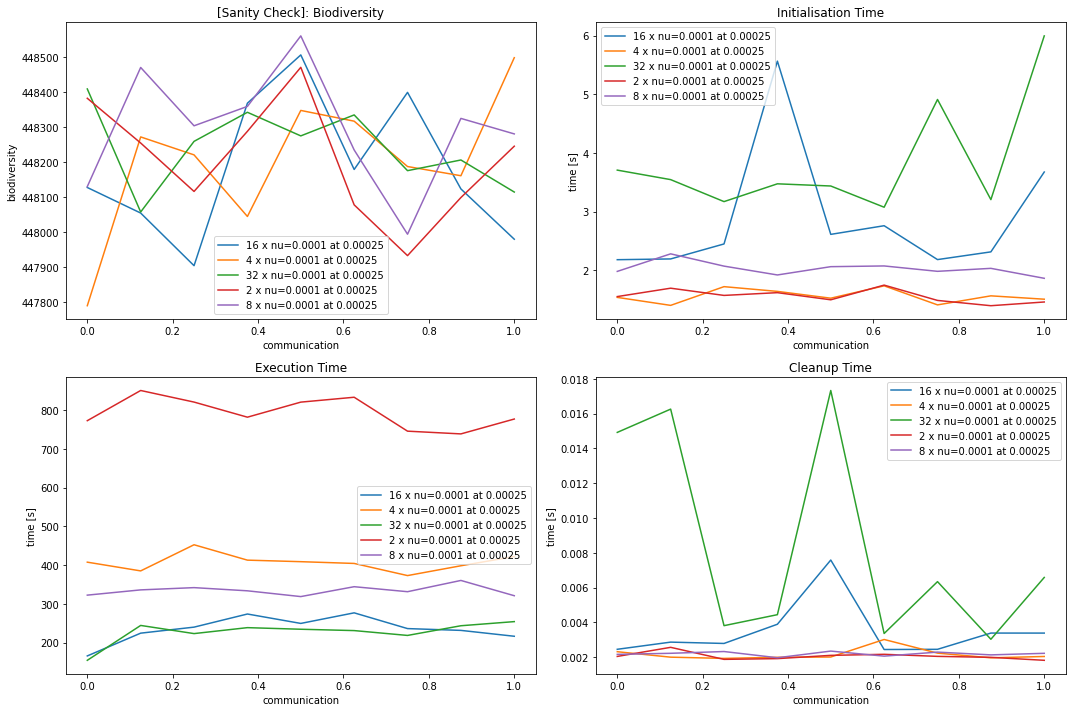

In [8]:
COMMUNICATION_FILE_PATTERN = re.compile(r"pbs\.(\d+)\.([+\-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE][+\-]?\d+)?)\.([+\-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE][+\-]?\d+)?)\.([+\-]?(?:0|[1-9]\d*)(?:\.\d*)?(?:[eE][+\-]?\d+)?)\.o\d+\.\d+")

results = defaultdict(lambda: defaultdict(lambda: defaultdict(list)))

for path in Path("communication").iterdir():
    match = COMMUNICATION_FILE_PATTERN.match(path.name)
    
    if match is None:
        continue
    
    partitions = int(match.group(1))
    speciation = float(match.group(2))
    sample = float(match.group(3))
    communication = float(match.group(4))
    
    with open(path) as file:
        stdout = file.read()
    
    match = BIODIVERSITY_PATTERN.search(stdout)
    if match is None:
        continue
    biodiversity = int(match.group(1))

    match = EXECUTION_PATTERN.search(stdout)
    if match is None:
        continue
    initialisation = parse_time(match.group(1))
    execution = parse_time(match.group(2))
    cleanup = parse_time(match.group(3))
    
    results[(speciation, sample)][partitions][communication].append((biodiversity, initialisation, execution, cleanup))
    
for (speciation, sample), entries in results.items():
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
    
    ax1.set_title("[Sanity Check]: Biodiversity")
    ax1.set_xlabel("communication")
    ax1.set_ylabel("biodiversity")
    
    ax2.set_title("Initialisation Time")
    ax2.set_xlabel("communication")
    ax2.set_ylabel("time [s]")
    
    ax3.set_title("Execution Time")
    ax3.set_xlabel("communication")
    ax3.set_ylabel("time [s]")
    
    ax4.set_title("Cleanup Time")
    ax4.set_xlabel("communication")
    ax4.set_ylabel("time [s]")
    
    for partitions, measures in entries.items():
        measures = { communication: [np.mean(s) for s in zip(*measure)] for communication, measure in measures.items() }

        communications, biodiversities, initialisations, executions, cleanups = zip(*sorted([communication] + rs for communication, rs in measures.items()))

        ax1.plot(communications, biodiversities, label=f"{partitions} x nu={speciation} at {sample}")
        ax2.plot(communications, initialisations, label=f"{partitions} x nu={speciation} at {sample}")
        ax3.plot(communications, executions, label=f"{partitions} x nu={speciation} at {sample}")
        ax4.plot(communications, cleanups, label=f"{partitions} x nu={speciation} at {sample}")
        
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax4.legend()

    plt.tight_layout()
    plt.show()